# How to build your first Deep Learning Model - Part 1

## Introduction

Deep Learning is one of the most popular technique in Machine Learning and is getting adopted in every field. It's getting adopted so widely that it will definitely be one of the must have requirements in every engineer's profile. If you are reading this then means you are already interested in learning Deep Learning. 

There are many online resources that helps you build your first Deep Learning Model. Here, we will take slightly different approach to build our first model. We will take top-down approach to come up with a quick model that makes any developer see results in like 10 mins. So, to summarize:

Goal: Build My first deep learning model in 10 mins. 

For our model, the setup that we will be using is as follows:

* **Python**
* **Keras** - A Neural Network API written in Python
* **Tensorflow** - A Deep Learning Framework as Keras Backend. 
* **MNIST** Data Set

## Preparing the Input
The MNIST dataset comprises of 60000 training examples and 10000 test examples of the handwritten digits 0-9, formatted as 28x28-pixel monochrome images.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


### Loading the Data

In [2]:
# parameters
batch_size = 128
num_classes = 10
epochs = 3
img_rows, img_cols = 28, 28
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_test_values = y_test

### Data Visualization

Output Label: 9


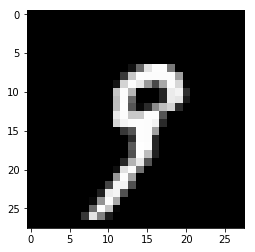

In [3]:
# display a training image
plt.imshow(x_train[19,:,:], cmap='gray')
print("Output Label:", y_train[19])

### Pre-processing the Data

In [4]:
print (x_train.shape)
print (x_test.shape)
print(x_train.shape[0])
# reshape data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

##After Reshape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
60000
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
# convert to 0-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
print("Before Conversion:", y_train[1:10,])
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("After Conversion:", y_train[1:10,])

Before Conversion: [0 4 1 9 2 1 3 1 4]
After Conversion: [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


## Creating the Neural Network

In [7]:
# define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Network Statistics

In [9]:
# print model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Training & Testing the Model

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 337s - loss: 0.3338 - acc: 0.8985 - val_loss: 0.0779 - val_acc: 0.9760
Epoch 2/3
60000/60000 [==============================] - 363s - loss: 0.1113 - acc: 0.9671 - val_loss: 0.0507 - val_acc: 0.9827
Epoch 3/3
60000/60000 [==============================] - 368s - loss: 0.0864 - acc: 0.9743 - val_loss: 0.0432 - val_acc: 0.9854
